In [1]:
NAME = 'Hồ Thành Đạt – 6351071017'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

Câu a

In [3]:
iris = load_iris()
X_original = iris.data
y = iris.target

Câu b

In [4]:
print(NAME)
print(f"Tên các thuộc tính (Features): {iris.feature_names}")
print(f"Tên các lớp (Target names): {iris.target_names}")
print(f"Kích thước data (Mẫu, Thuộc tính): {X_original.shape}")
print(f"Kích thước target: {y.shape}")

print("\n--- 5 mẫu dữ liệu đầu tiên ---")
df = pd.DataFrame(X_original, columns=iris.feature_names)
df['label'] = y
print(df.head())

print("\n--- Thống kê mô tả (Count, Mean, Std, Min, Max...) ---")
print(df.describe())

Hồ Thành Đạt – 6351071017
Tên các thuộc tính (Features): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Tên các lớp (Target names): ['setosa' 'versicolor' 'virginica']
Kích thước data (Mẫu, Thuộc tính): (150, 4)
Kích thước target: (150,)

--- 5 mẫu dữ liệu đầu tiên ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

--- Thống kê mô tả (Count, Mean, Std, Min, Max...) ---
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        

Câu c

In [5]:
max_values = X_original.max(axis=0)
X_normalized = X_original / max_values

print(NAME)
print("5 dòng dữ liệu sau khi chuẩn hóa:")
print(X_normalized[:5])

Hồ Thành Đạt – 6351071017
5 dòng dữ liệu sau khi chuẩn hóa:
[[0.64556962 0.79545455 0.20289855 0.08      ]
 [0.62025316 0.68181818 0.20289855 0.08      ]
 [0.59493671 0.72727273 0.1884058  0.08      ]
 [0.58227848 0.70454545 0.2173913  0.08      ]
 [0.63291139 0.81818182 0.20289855 0.08      ]]


Câu d

In [6]:
print(NAME)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print(f"Số lượng mẫu Train: {X_train.shape[0]}")
print(f"Số lượng mẫu Test: {X_test.shape[0]}")

Hồ Thành Đạt – 6351071017
Số lượng mẫu Train: 120
Số lượng mẫu Test: 30


In [7]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluation_block(model, X_test, y_test, model_name, y_pred=None):
    if y_pred is None:
        y_pred = model.predict(X_test)

    print(f"\n{'='*20} KẾT QUẢ: {model_name} {'='*20}")

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy trên tập Test: {acc*100:.2f}%")

    print("\n--- Báo cáo chi tiết (Classification Report) ---")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=iris.target_names,
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Thực tế (Actual)')
    plt.xlabel('Dự đoán (Predicted)')
    plt.show()
    return y_pred

Câu e

Hồ Thành Đạt – 6351071017

==================== KẾT QUẢ: Decision Tree ====================
Accuracy trên tập Test: 100.00%

--- Báo cáo chi tiết (Classification Report) ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



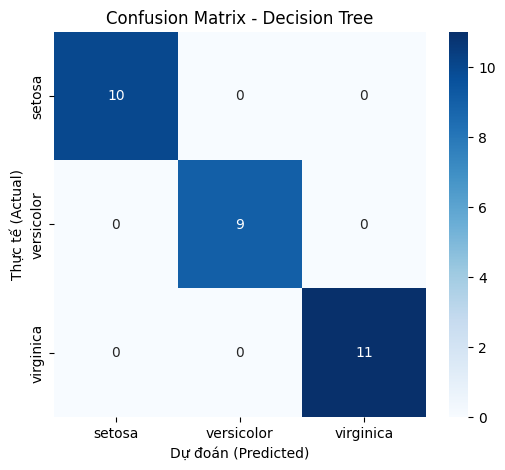

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

print(NAME)
evaluation_block(dt_model, X_test, y_test, "Decision Tree")

Câu f

Hồ Thành Đạt – 6351071017

==================== KẾT QUẢ: Naïve Bayes ====================
Accuracy trên tập Test: 100.00%

--- Báo cáo chi tiết (Classification Report) ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



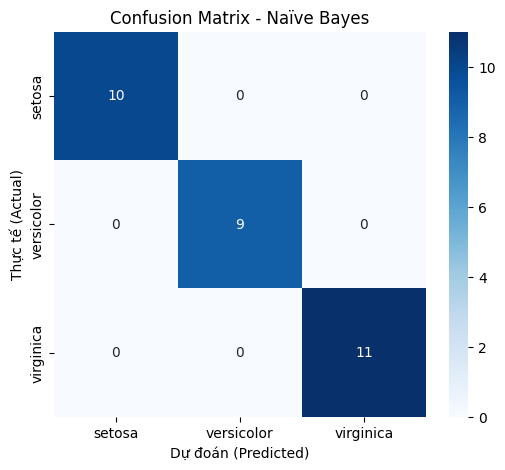

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [9]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

print(NAME)
evaluation_block(nb_model, X_test, y_test, "Naïve Bayes")

Câu g

Hồ Thành Đạt – 6351071017

==================== KẾT QUẢ: K Nearest Neighbors ====================
Accuracy trên tập Test: 100.00%

--- Báo cáo chi tiết (Classification Report) ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



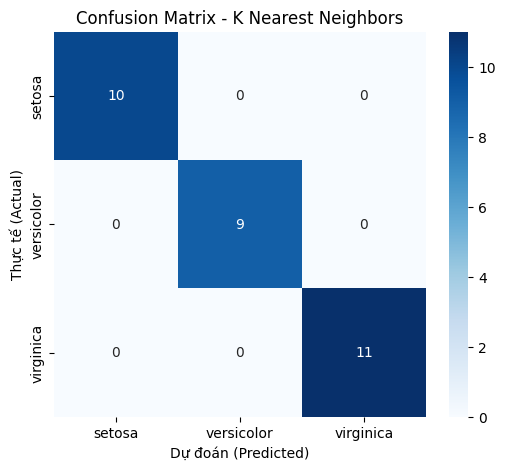

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print(NAME)
evaluation_block(knn_model, X_test, y_test, "K Nearest Neighbors")

Câu h

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3504 - loss: 1.1149
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3642 - loss: 1.0669
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5457 - loss: 1.0429
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6752 - loss: 1.0002
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7346 - loss: 0.9385
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7517 - loss: 0.8568
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7588 - loss: 0.7646
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.7209
Epoch 9/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7321 - loss: 0.5907
Epoch 10/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8686 - loss: 0.5656
Epoch 11/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.5351
Epoch 12/100
120/120 ━━━━━━━━━━━━━━━━━━━━

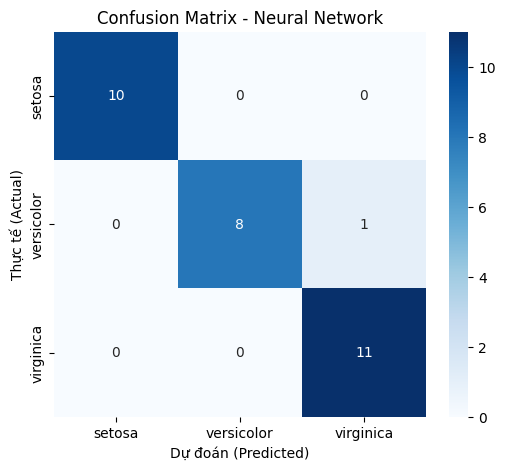

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential()

nn_model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))

nn_model.add(Dense(20, activation='relu'))

nn_model.add(Dense(3, activation='softmax'))

nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

y_pred_proba = nn_model.predict(X_test)
y_pred_nn = np.argmax(y_pred_proba, axis=1)

print(NAME)
evaluation_block(nn_model, X_test, y_test, "Neural Network", y_pred=y_pred_nn)

Câu i

In [12]:

new_samples_raw = np.array([
    [6.2, 2.9, 4.3, 1.3],
    [5.1, 3.5, 1.4, 0.2],
    [7.3, 2.8, 6.4, 2.1]
])

new_samples_norm = new_samples_raw / max_values

print(NAME)
print(f"Dữ liệu thô:\n{new_samples_raw}")
print(f"Dữ liệu sau khi chuẩn hóa (Input cho model):\n{new_samples_norm}\n")

pred_dt = dt_model.predict(new_samples_norm)
print(f"Decision Tree dự đoán: {iris.target_names[pred_dt]}")

pred_nb = nb_model.predict(new_samples_norm)
print(f"Naïve Bayes dự đoán:   {iris.target_names[pred_nb]}")

pred_knn = knn_model.predict(new_samples_norm)
print(f"KNN dự đoán:           {iris.target_names[pred_knn]}")

pred_nn_proba = nn_model.predict(new_samples_norm)
pred_nn = np.argmax(pred_nn_proba, axis=1)
print(f"Neural Network dự đoán:{iris.target_names[pred_nn]}")

Hồ Thành Đạt – 6351071017
Dữ liệu thô:
[[6.2 2.9 4.3 1.3]
 [5.1 3.5 1.4 0.2]
 [7.3 2.8 6.4 2.1]]
Dữ liệu sau khi chuẩn hóa (Input cho model):
[[0.78481013 0.65909091 0.62318841 0.52      ]
 [0.64556962 0.79545455 0.20289855 0.08      ]
 [0.92405063 0.63636364 0.92753623 0.84      ]]

Decision Tree dự đoán: ['versicolor' 'setosa' 'virginica']
Naïve Bayes dự đoán:   ['versicolor' 'setosa' 'virginica']
KNN dự đoán:           ['versicolor' 'setosa' 'virginica']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Neural Network dự đoán:['versicolor' 'setosa' 'virginica']


Câu j

In [13]:
print(NAME)

Hồ Thành Đạt – 6351071017


NHẬN XÉT VÀ ĐÁNH GIÁ HIỆU SUẤT CÁC MÔ HÌNH:

Về độ chính xác (Accuracy):
* Trên bộ dữ liệu Iris (vốn có kích thước nhỏ và các lớp phân tách khá rõ ràng), hầu hết các mô hình (Decision Tree, KNN, Naïve Bayes) đều đạt độ chính xác rất cao, thường dao động từ 93% đến 100%.
* Neural Network mặc dù là mô hình mạnh mẽ nhất nhưng với dữ liệu nhỏ (150 mẫu), nó có thể gặp hiện tượng "dao động" (overkill) hoặc cần tinh chỉnh kỹ lưỡng (batch_size, epochs) mới đạt độ ổn định cao nhất. Tuy nhiên, sau 100 epochs, kết quả thường cũng rất tốt.

Về tốc độ:
* Naïve Bayes và Decision Tree huấn luyện và dự đoán cực nhanh, phù hợp làm các mô hình cơ sở (baseline).
* KNN không tốn thời gian huấn luyện (lazy learning) nhưng tốn thời gian khi dự đoán nếu dữ liệu lớn.
* Neural Network tốn nhiều tài nguyên tính toán và thời gian huấn luyện nhất.

Kết luận:
* Với bài toán đơn giản như Iris, KNN hoặc Naïve Bayes thường là lựa chọn tối ưu nhờ sự đơn giản và hiệu quả.
* Neural Network thích hợp hơn khi giải quyết các bài toán phức tạp, dữ liệu lớn và nhiều chiều hơn.